In [78]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import seaborn as sns

In [79]:
data = pd.read_csv(r"C:\PROJECT\Nobel prize analysis\nobel_prize_data.csv")

In [80]:
data.shape

(962, 16)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [82]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
837,2010,Peace,The Nobel Peace Prize 2010,"""for his long and non-violent struggle for fun...",1/1,Individual,Liu Xiaobo,1955-12-28,NaN,China,China,Male,NaN,NaN,NaN,CHN


In [83]:
a = data["year"].min()
a

1901

In [84]:
a = data["year"].max()
a

2020

In [85]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
957    False
958    False
959    False
960    False
961    False
Length: 962, dtype: bool

In [86]:
data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [87]:
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [88]:
data.isna().sum().sum()

1023

In [89]:
col_subset = ['year','category', 'laureate_type','birth_date','full_name', 'organization_name']
data.loc[data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [90]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
data.loc[data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


That makes sense. Since the organisation's name is in the full_name column, the organisation_name column contains NaN.In addition,for rows where the organization_name column has no value, we see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [91]:
data.birth_date = pd.to_datetime(data.birth_date)

In [92]:
separate = data.prize_share.str.split('/',expand=True)
first = pd.to_numeric(separate[0])
second = pd.to_numeric(separate[1])
data['share_pct']= first/second

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [98]:
men_women = data.groupby(['category','sex'],as_index=False,).agg({'prize':pd.Series.count})
men_women.sort_values('prize',ascending=False,inplace=True)
men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [99]:
split_men_women = px.bar(x=men_women.category,
                         y=men_women.prize,
                         color=men_women.sex,
                         title='Prizes awarded per category between men and women')
split_men_women.update_layout(xaxis_title = 'Nobel prize category',
                              yaxis_title = 'Number of prizes')
split_men_women.show()

In [97]:
category = data.sex.value_counts()
fig = px.pie(labels=category.index,
             values= category.values,
             title="Percentage of Male vs. Female Winners",
             names=category.index,
             hole=0.5)
fig.update_traces(textposition= 'inside',textfont_size= 15,textinfo = 'percent')
fig.show()

c:\Users\fatem\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [106]:
data[data.sex == 'Female'].sort_values('year',ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


The first 3 women to win

In [107]:
winner = data.duplicated(subset=['full_name'],keep=False)
multiple_winner = data[winner]
print(f'There are {multiple_winner.full_name.nunique()} winners who were awarded the prize more than once')

There are 6 winners who were awarded the prize more than once


In [108]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winner[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


Only 4 of the repeat winners were individuals


We see that Marie Curie actually got the Nobel prize twice once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.

In [113]:
prizes_per_category = data.category.value_counts()
bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
bar.show()


In [114]:
data[data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.5
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.0


The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.

In [118]:
prize_per_year = data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [120]:
average = prize_per_year.rolling(window=5).mean()
average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     6.2
        ... 
2016    11.6
2017    12.0
2018    12.0
2019    12.2
2020    12.4
Name: prize, Length: 117, dtype: float64

we have to count the number of Nobel prizes that are awarded each year.

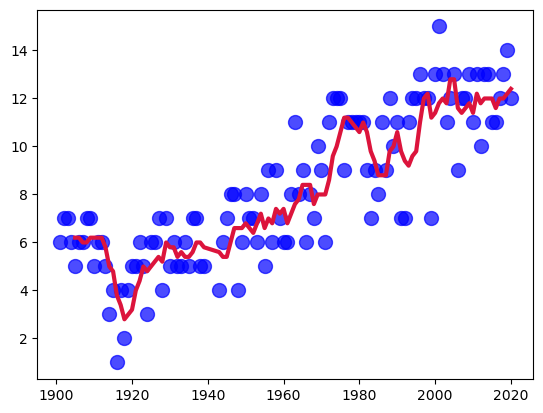

In [124]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='blue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

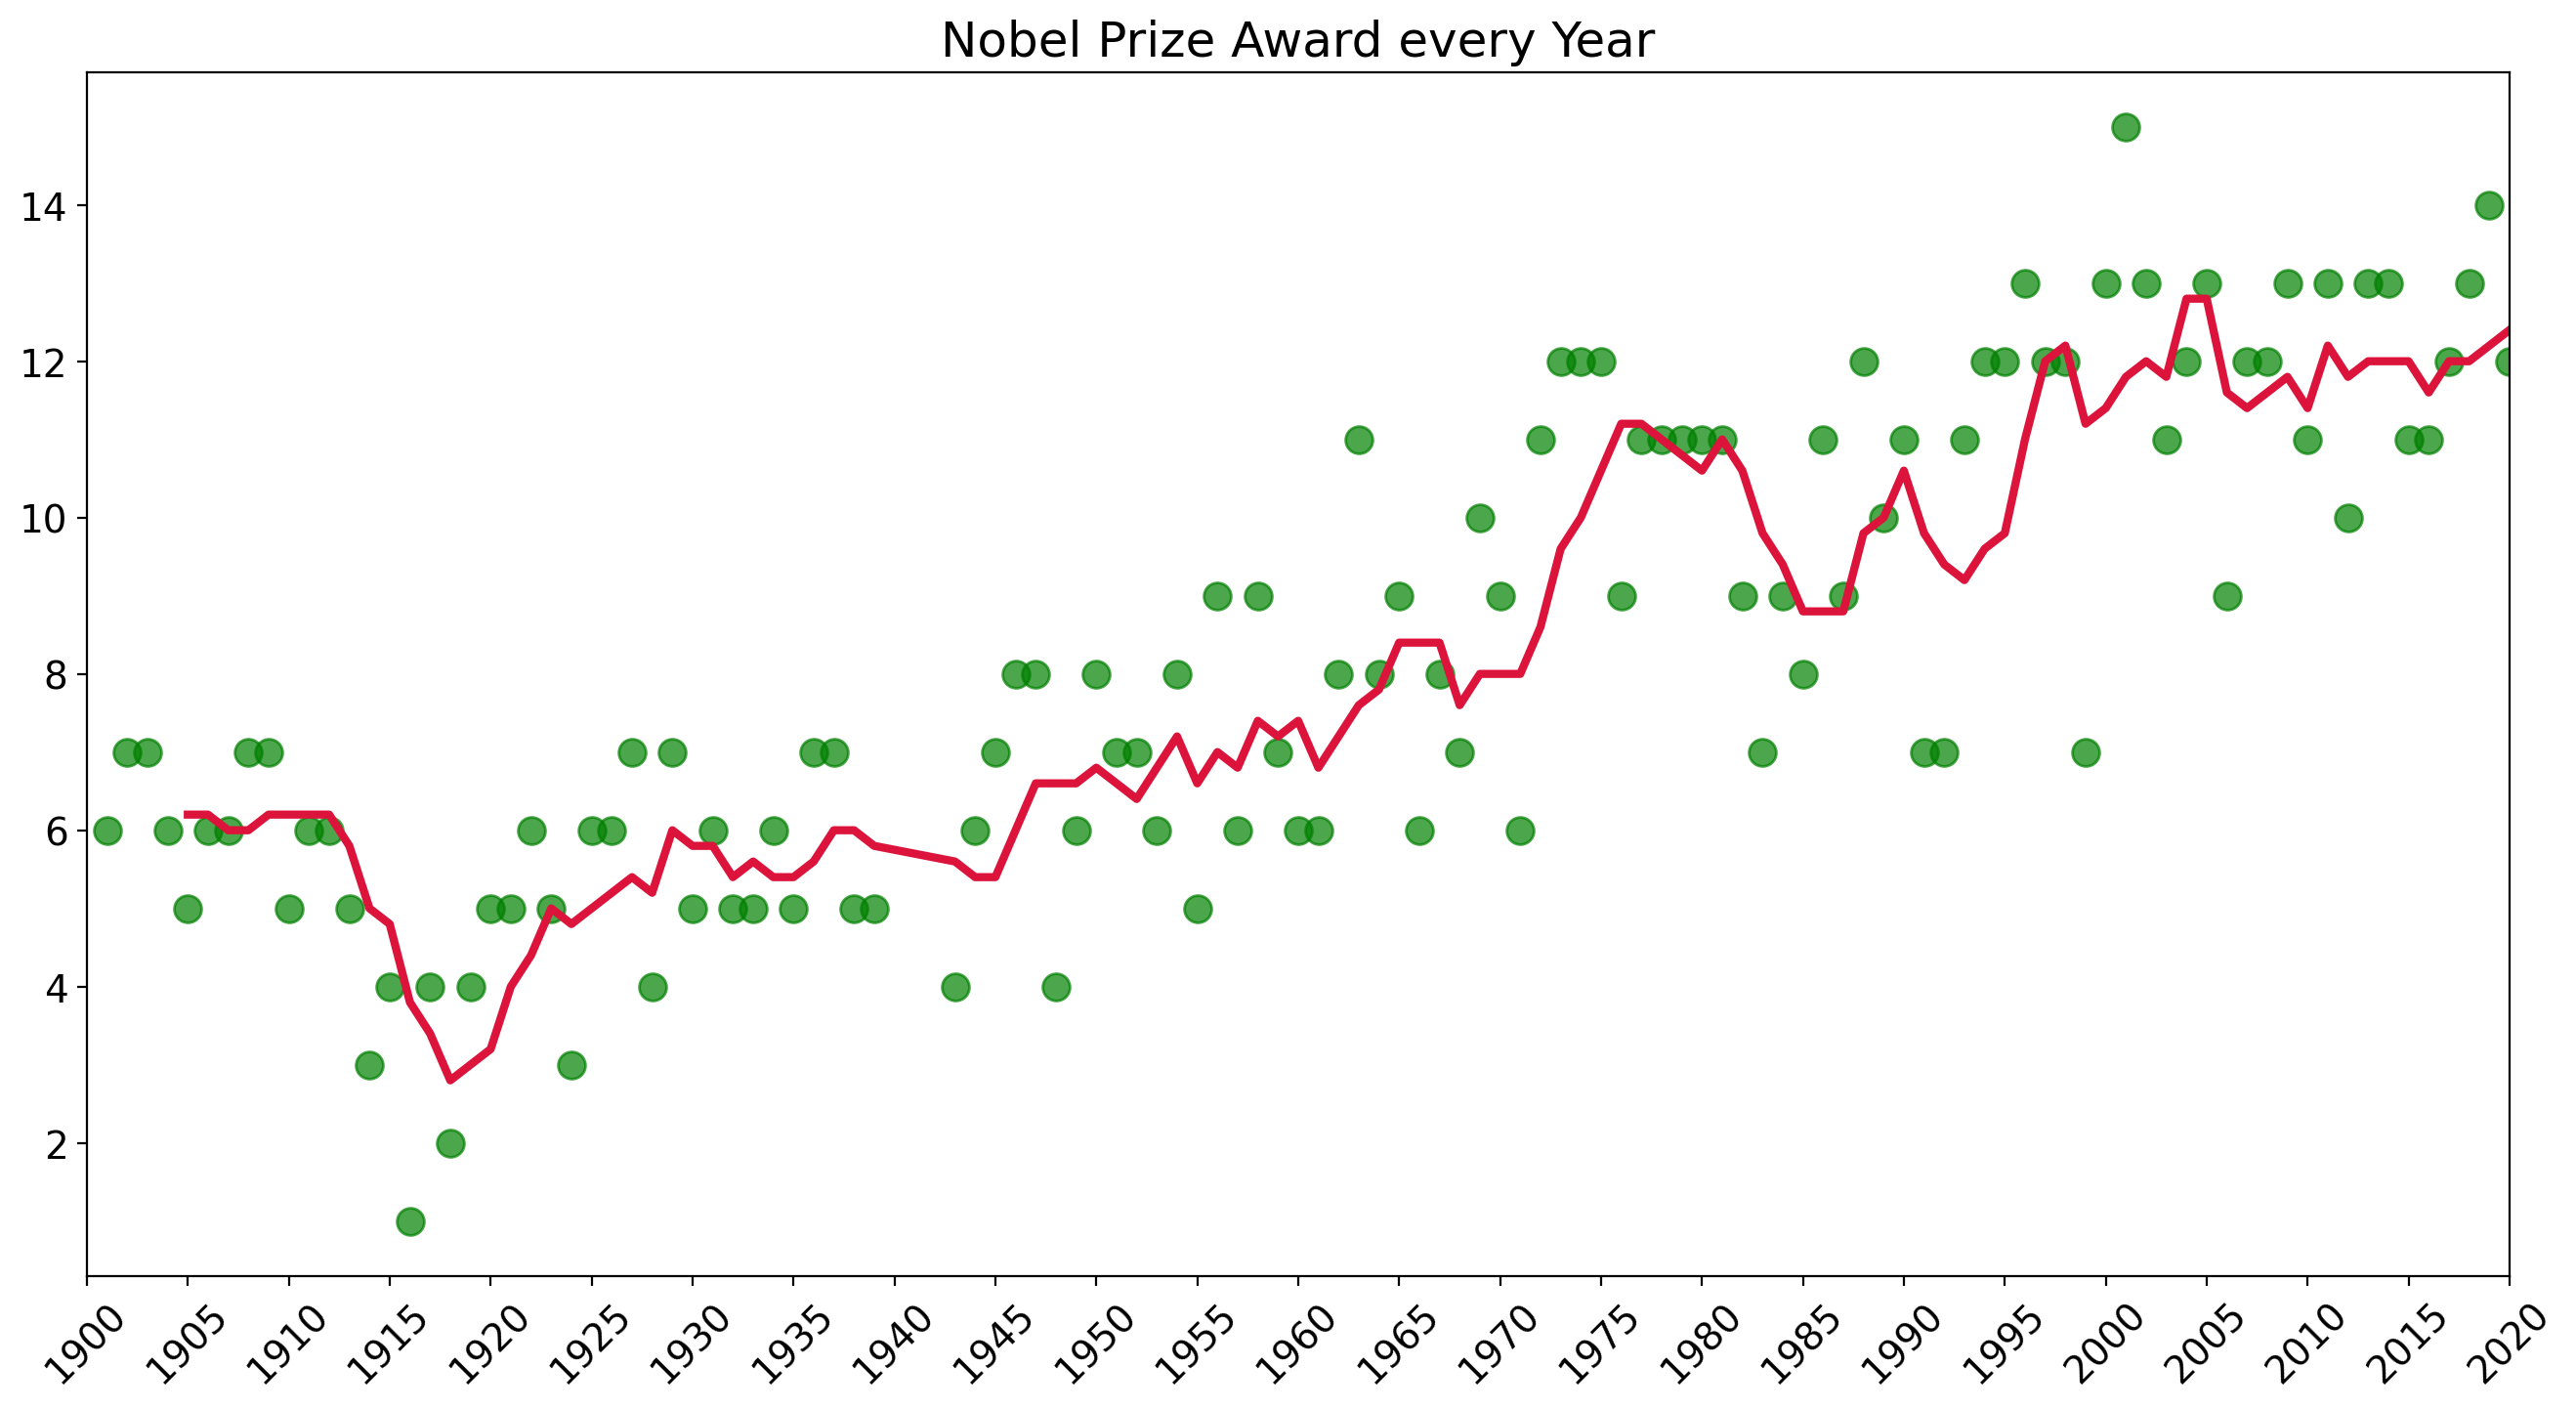

In [127]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prize Award every Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='green',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

In [128]:
yearly_share_avg = data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_average = yearly_share_avg.rolling(window=5).mean()

If more prizes are given out, perhaps it is because the prize is split between more people.

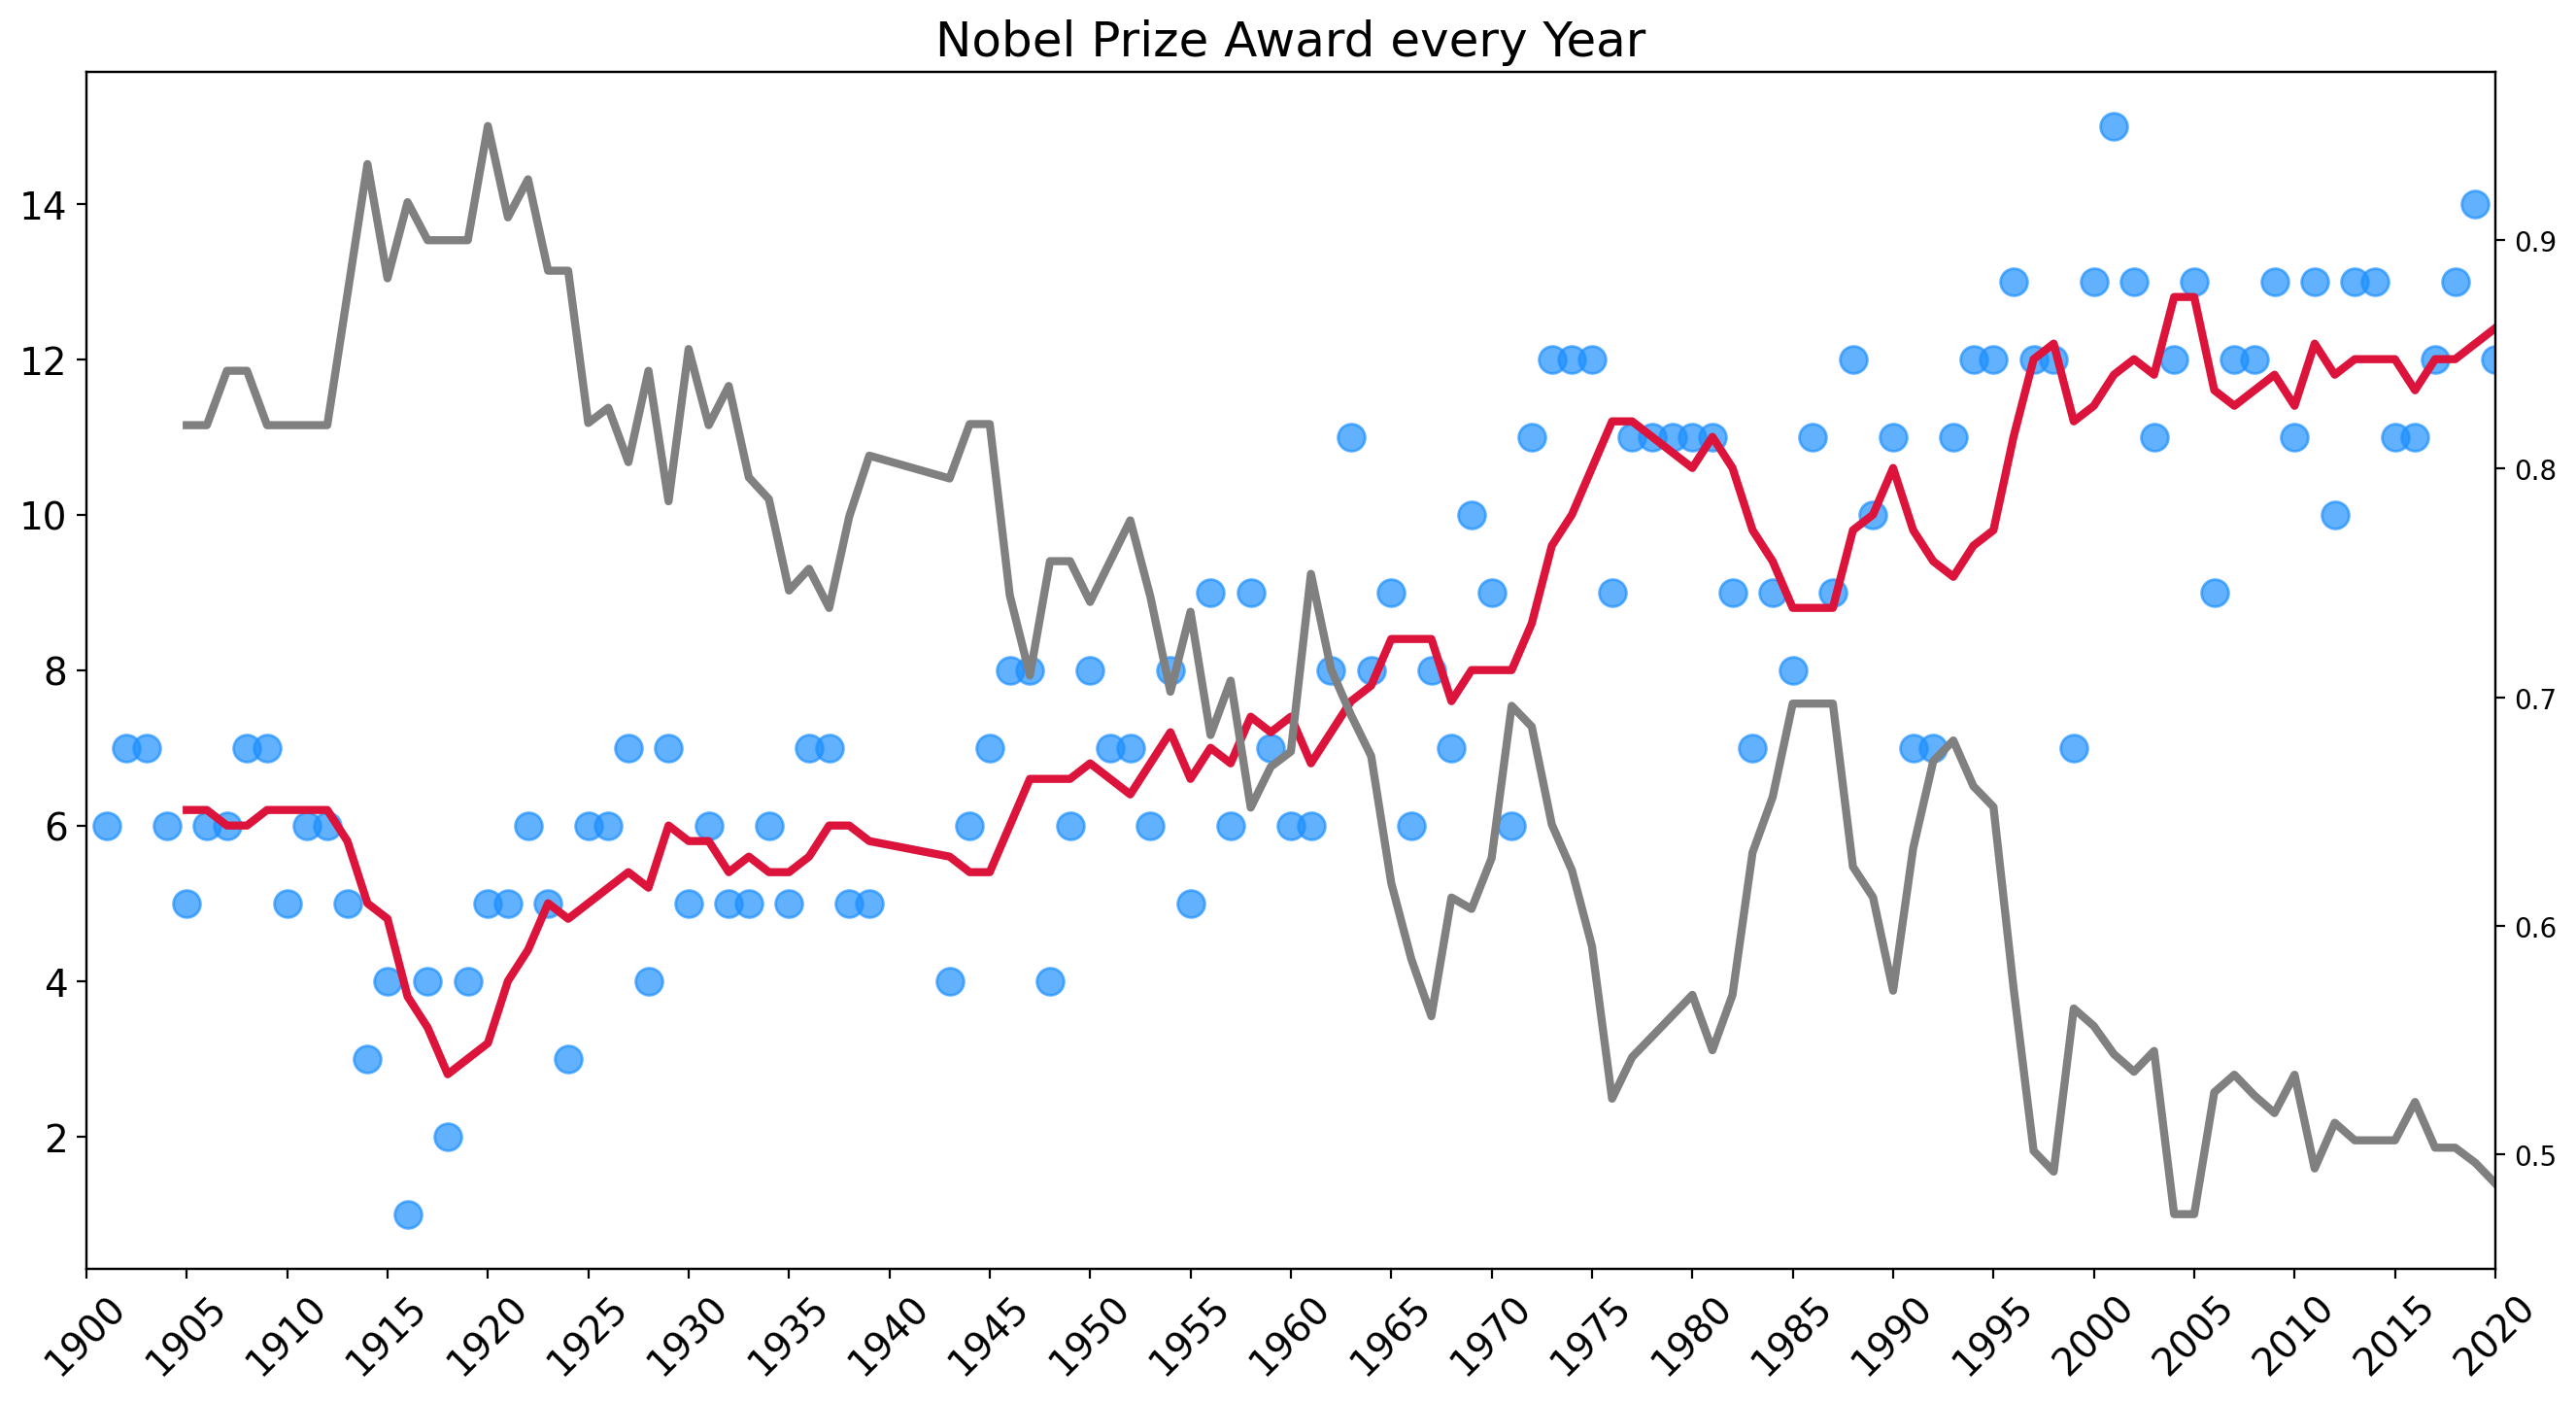

In [129]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prize Award every Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

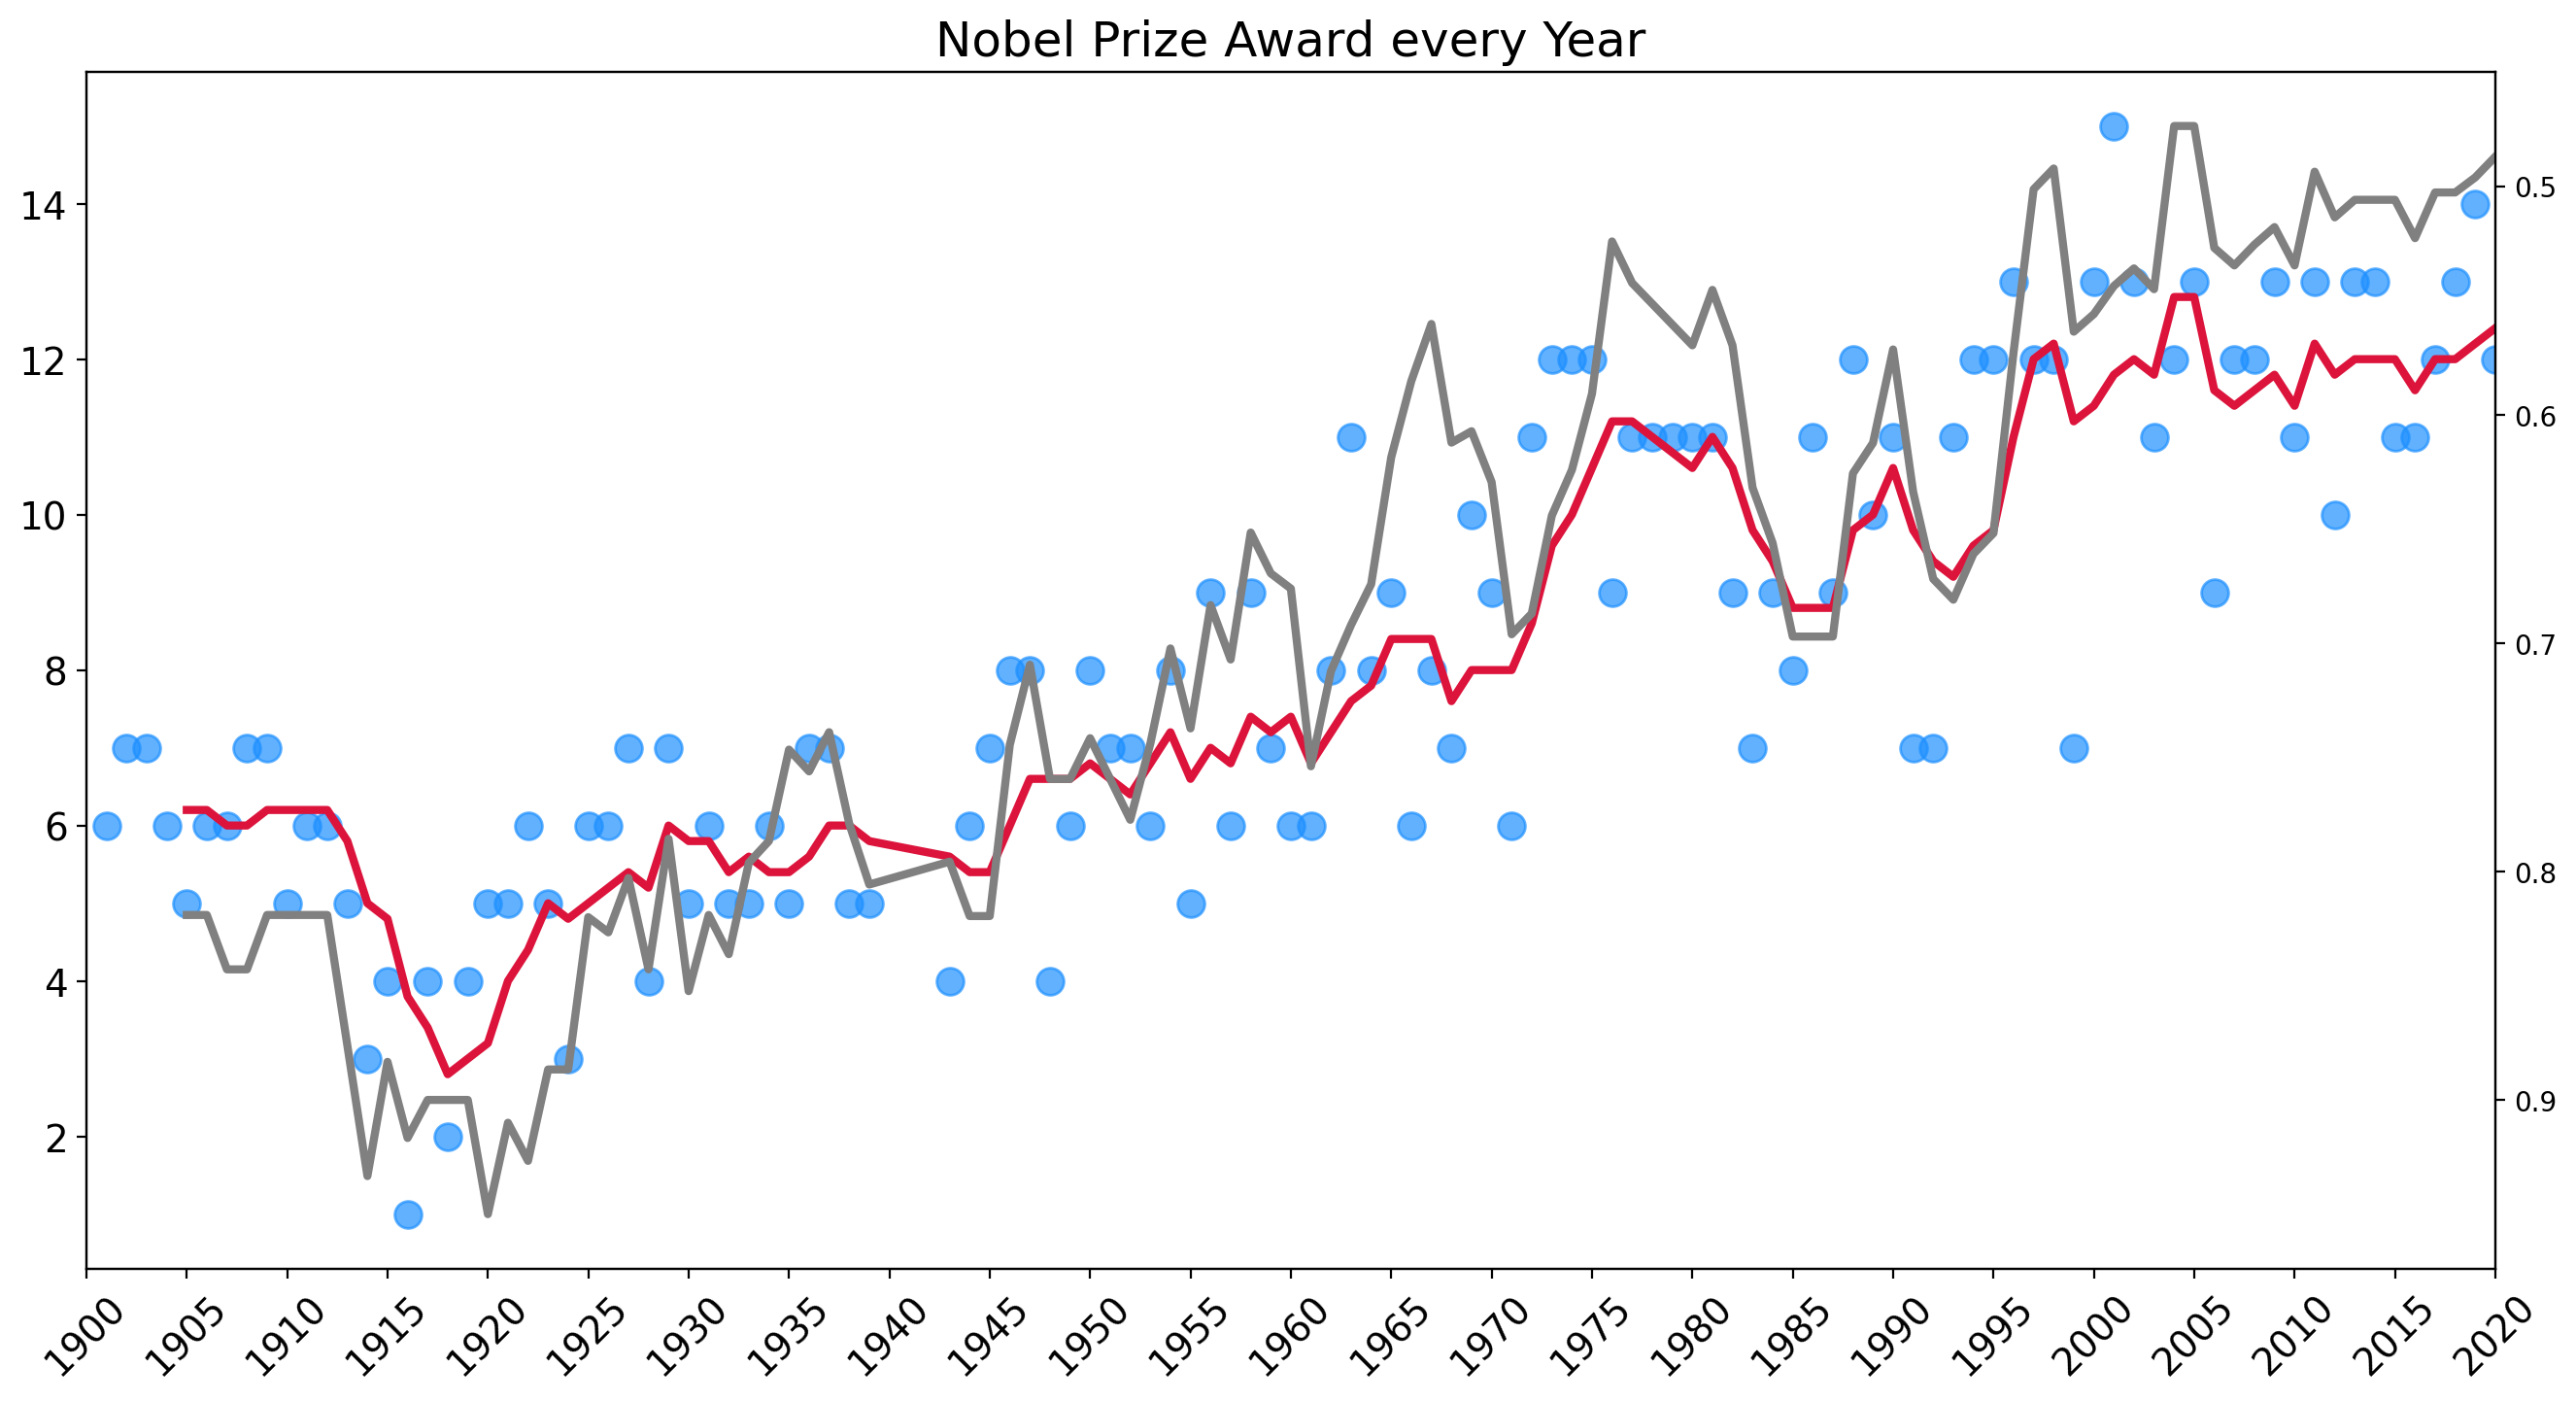

In [130]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prize Award every Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

In [135]:
top_countries = data.groupby(['birth_country_current'],as_index=False).agg({'prize':pd.Series.count})
top_countries.sort_values(by='prize',inplace=True)
top_countries_20 = top_countries[-20:]
top_countries_20

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [137]:
h_bar = px.bar(x=top_countries_20.prize,
               y=top_countries_20.birth_country_current,
               orientation='h',
               color=top_countries_20.prize,
               color_continuous_scale='plasma',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

In [138]:
countries = data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
countries.sort_values('prize', ascending=False)
world_map = px.choropleth(countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [139]:
cat_country = data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

merged= pd.merge(cat_country, top_countries_20, on='birth_country_current')
# change column names
merged.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged.sort_values(by='total_prize', inplace=True)

cat_cntry_bar = px.bar(x=merged.cat_prize,
                       y=merged.birth_country_current,
                       color=merged.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()



 The US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

In [140]:
prize_year = data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [141]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [142]:
chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
chart.show()

The Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too.

The Top Research Organisations

In [144]:
top_orgs = data.organization_name.value_counts()[:20]
top_orgs

University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Max-Planck-Institut                             13
Rockefeller University                          13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Institut Pasteur                                 7
Harvard Medical School                           7
London University                                7
Sorbonne University            

In [154]:
org_bar = px.bar(x = top_orgs.values,
                 y = top_orgs.index,
                 orientation='h',
                 color=top_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()


In [148]:
top_org_cities = data.organization_city.value_counts()[:20]
top_org_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x = top_org_cities.values,
                  y = top_org_cities.index,
                  orientation='h',
                  color=top_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar.show()

In [155]:
top20_cities = data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.haline,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

In [157]:
country_city_org = data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [158]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.



In [161]:
birth_year = data.birth_date.dt.year
birth_year

0      1852.0
1      1839.0
2      1854.0
3      1822.0
4      1828.0
        ...  
957    1949.0
958       NaN
959    1965.0
960    1952.0
961    1931.0
Name: birth_date, Length: 962, dtype: float64

In [167]:
data['winners_age'] = data.year - birth_year

In [168]:
display(data.nlargest(n=1, columns='winners_age'))
display(data.nsmallest(n=1, columns='winners_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winners age,winners_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winners age,winners_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0,17.0


John Goodenough was 97 years old when he got the Nobel prize. on the other hand 17 years old Malala Yousafzai got the prize from pakistan.

In [166]:
data.describe()

,year,share_pct,winners age,winners_age
count,962.000000,962.000000,934.000000,934.000000
mean,1971.816008,0.626819,59.948608,59.948608
std,33.813537,0.293861,12.617785,12.617785
min,1901.000000,0.250000,17.000000,17.000000
25%,1948.000000,0.333333,51.000000,51.000000
50%,1977.000000,0.500000,60.000000,60.000000
75%,2001.000000,1.000000,69.000000,69.000000
max,2020.000000,1.000000,97.000000,97.000000


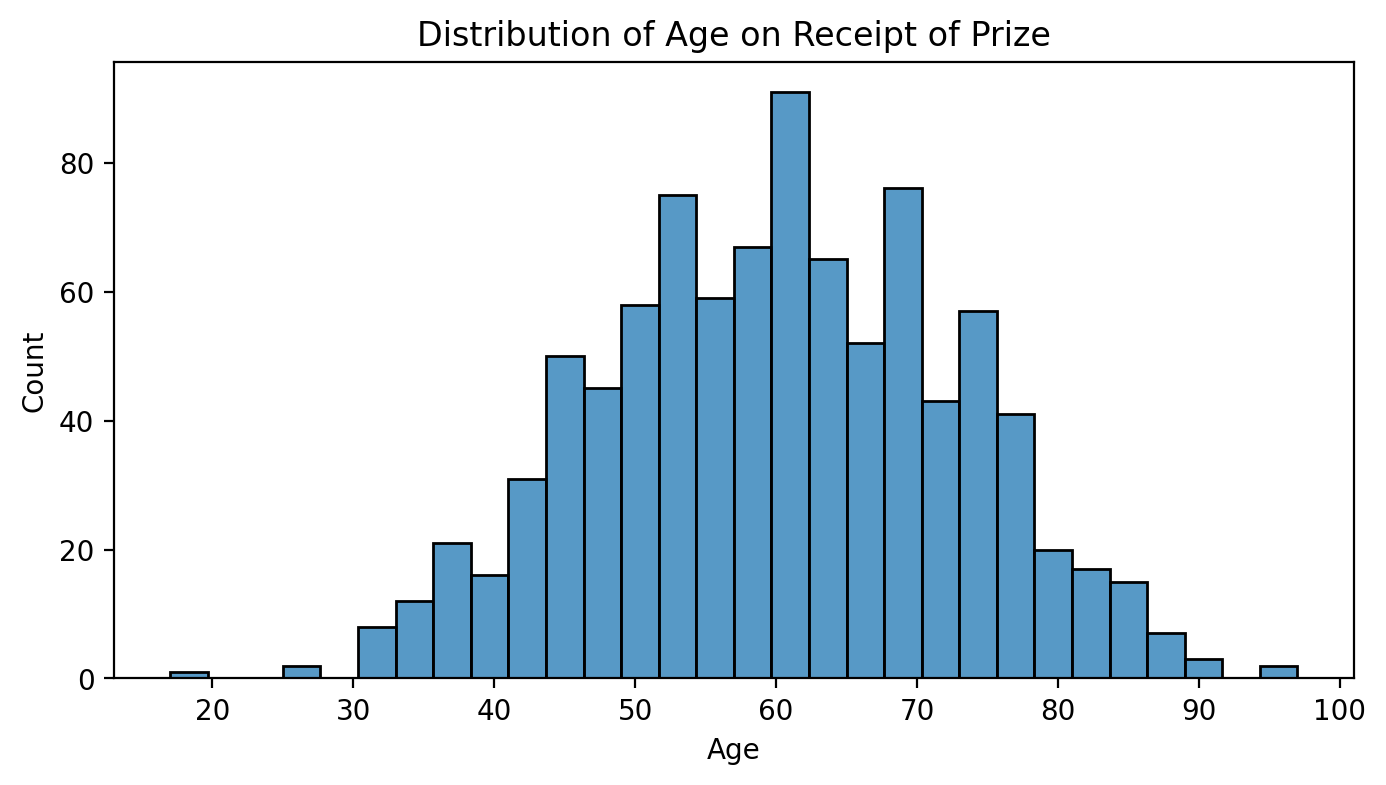

In [169]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=data,
             x=data.winners_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

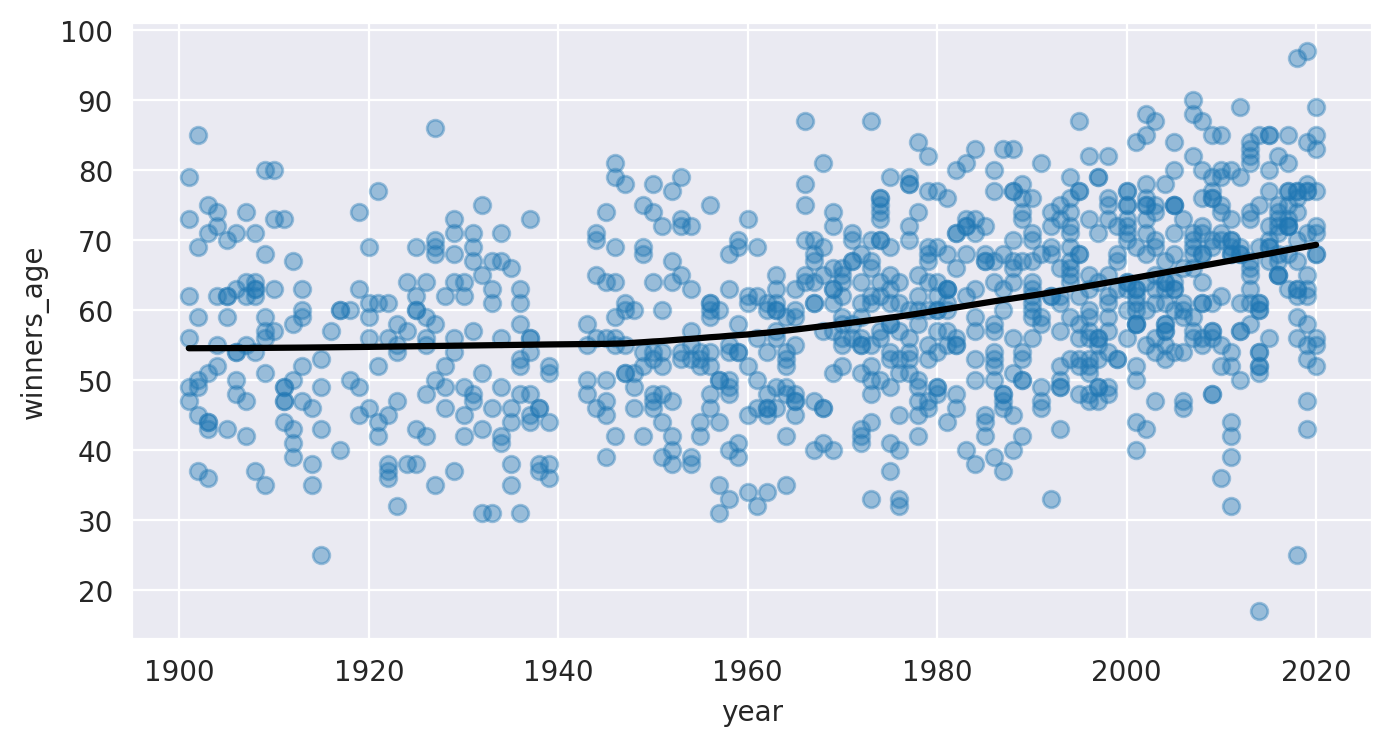

In [171]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=data,
                x='year',
                y='winners_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

The best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old.

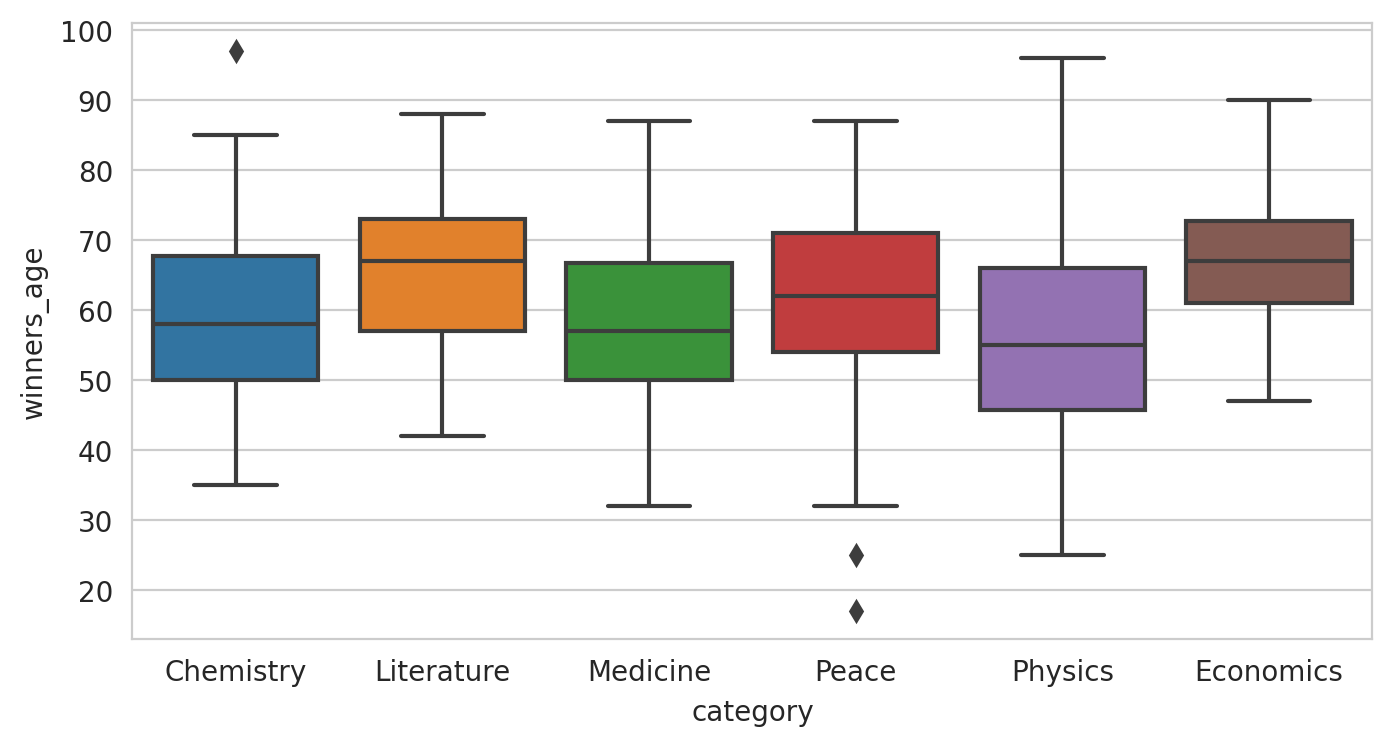

In [173]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=data,
                x='category',
                y='winners_age')
 
plt.show()

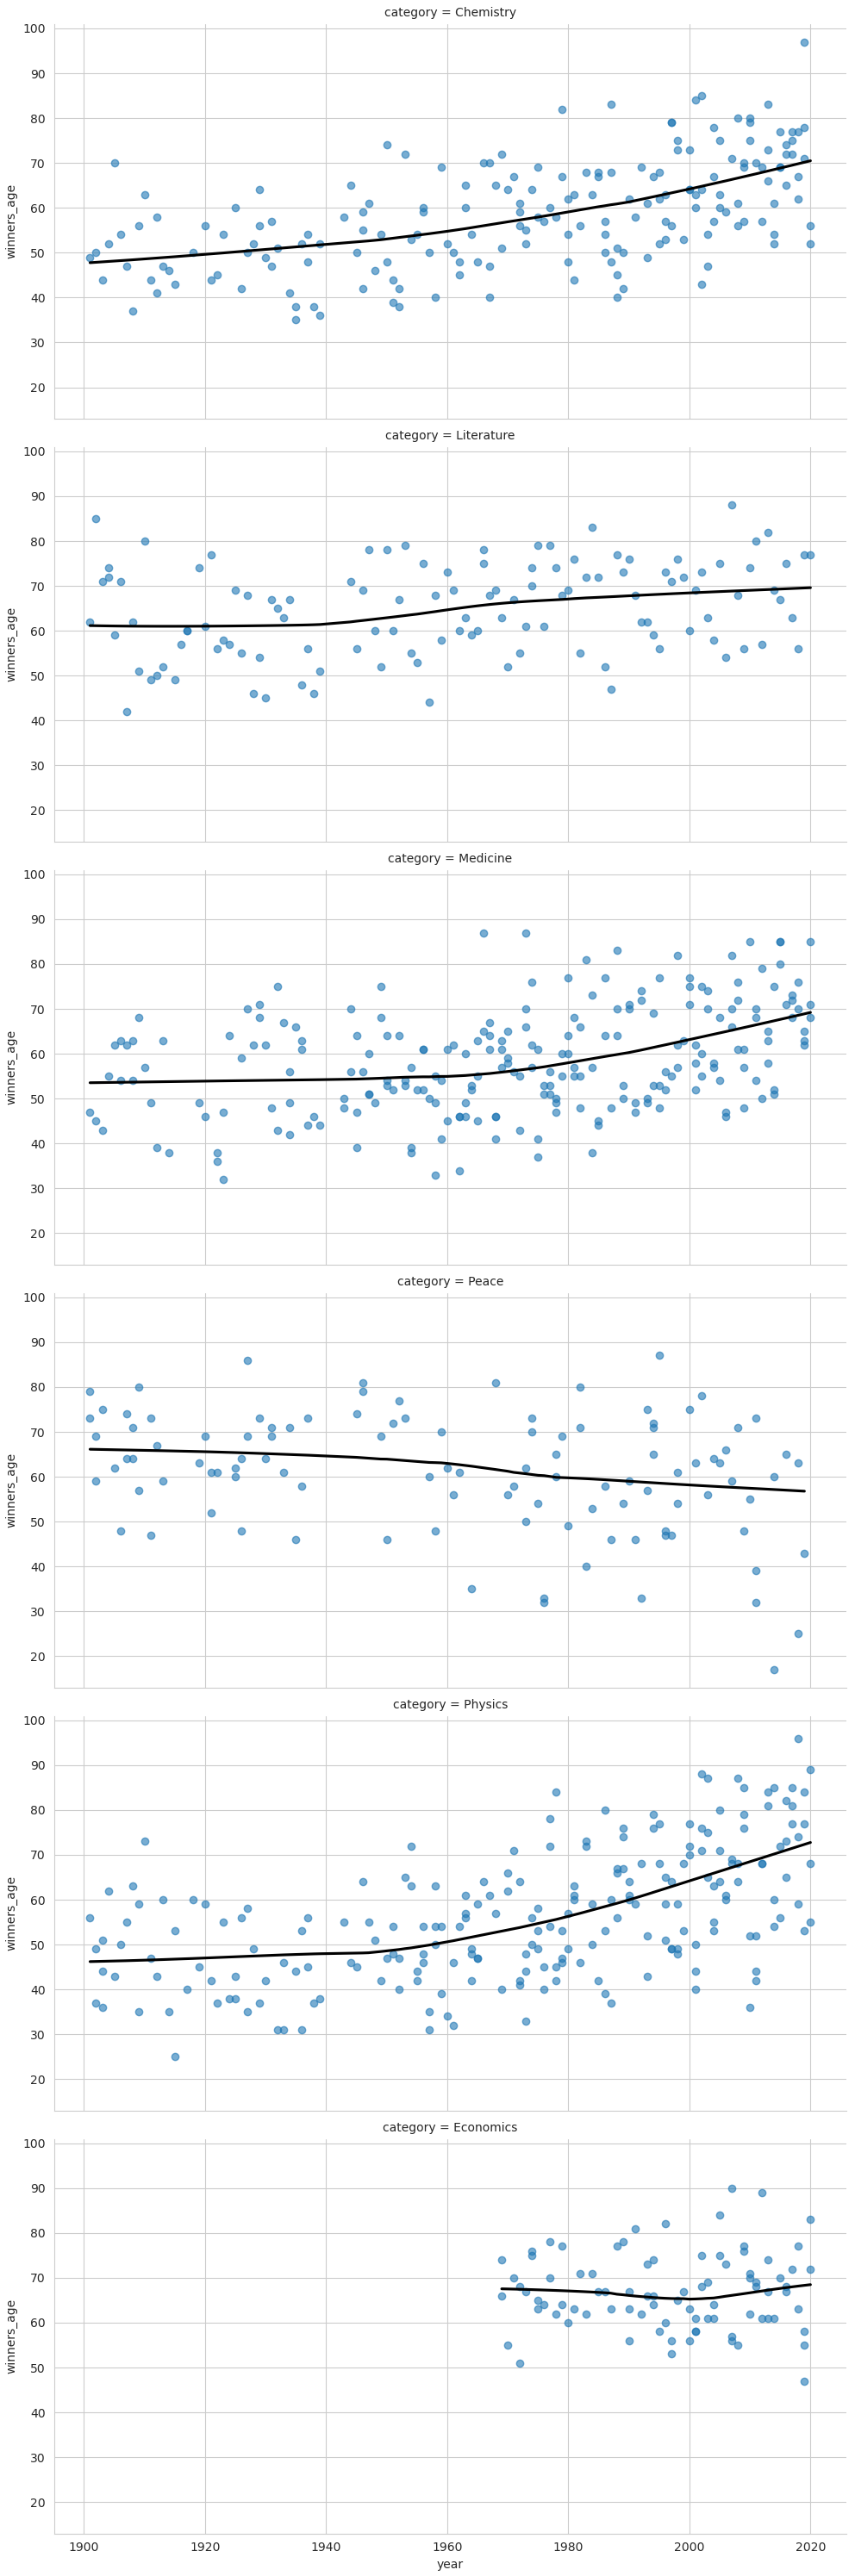

In [174]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=data,
               x='year', 
               y='winners_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

To combine all these charts into the same chart, we can use the hue parameter

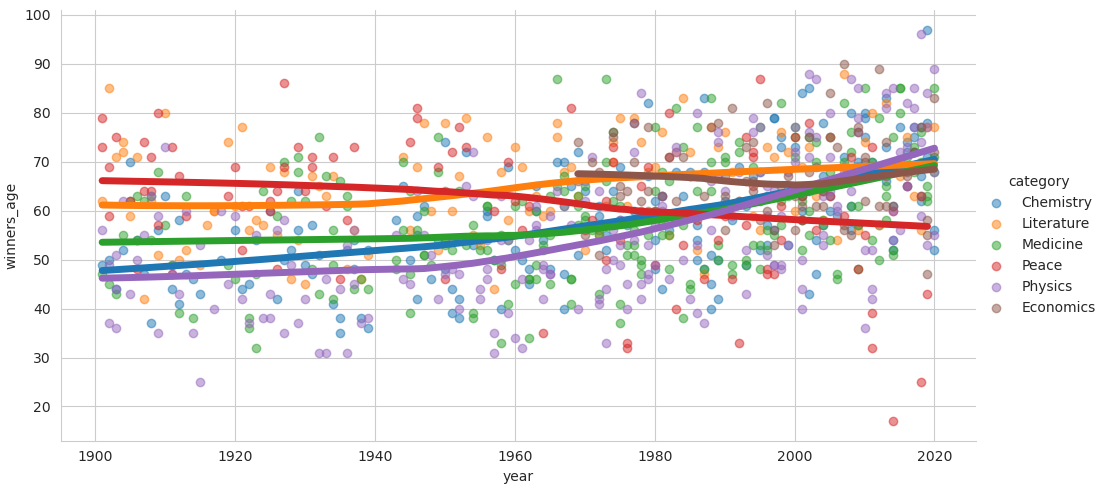

In [175]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=data,
               x='year',
               y='winners_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()
